<a href="https://colab.research.google.com/github/jennifergoldwin/FGA-HUAWEI-AI/blob/main/classify_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL #library image python buat load image or create new

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#model sequential : 1 input - 1 output
#model fungsional : banyak input - banyak output

In [ ]:
import pathlib

url_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_direktori = tf.keras.utils.get_file('flower_photos', origin = url_dataset, untar=True)
data_dir = pathlib.Path(data_direktori)

In [ ]:
total_image = len(list(data_dir.glob('*/*.jpg')))
print(total_image)

3670


In [ ]:
batch_size = 32
image_height = 180
image_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset='training',
    seed = 123,
    image_size = (image_height,image_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.


In [ ]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset='validation',
    seed = 123,
    image_size = (image_height,image_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 367 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


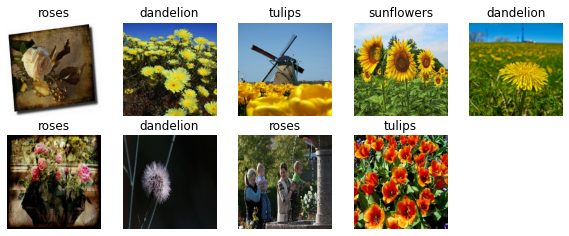

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

1 pixel = R,G,B(21,255,31) 0-255 computer mengenal 0 dan 1 = 0.3 0.999

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 0.96902645


In [ ]:
num_classes = 5
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(image_height,image_width,3)),
                    #convo
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    #convo2
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    #convo3
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),

                    #fully connected layer
                    layers.Flatten(),
                    layers.Dense(128,activation='relu'),
                    layers.Dense(num_classes)
                    ])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )
#menginformasikan ke loss bahwa data ini tidak di normalisasi from_logits = True

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = valid_ds,
    epochs = 10
)

Epoch 1/10
104/104 [==============================] - 105s 993ms/step - loss: 1.3196 - accuracy: 0.4444 - val_loss: 1.0267 - val_accuracy: 0.5940
Epoch 2/10
104/104 [==============================] - 104s 992ms/step - loss: 0.9531 - accuracy: 0.6267 - val_loss: 0.9478 - val_accuracy: 0.6322
Epoch 3/10
104/104 [==============================] - 103s 991ms/step - loss: 0.7550 - accuracy: 0.7190 - val_loss: 0.9049 - val_accuracy: 0.6512
Epoch 4/10
104/104 [==============================] - 104s 994ms/step - loss: 0.5219 - accuracy: 0.8093 - val_loss: 0.9732 - val_accuracy: 0.6431
Epoch 5/10
104/104 [==============================] - 104s 1s/step - loss: 0.3324 - accuracy: 0.8856 - val_loss: 1.1933 - val_accuracy: 0.6594
Epoch 6/10
104/104 [==============================] - 104s 995ms/step - loss: 0.1744 - accuracy: 0.9431 - val_loss: 1.3821 - val_accuracy: 0.6213
Epoch 7/10
104/104 [==============================] - 102s 978ms/step - loss: 0.1248 - accuracy: 0.9616 - val_loss: 1.3194 - va

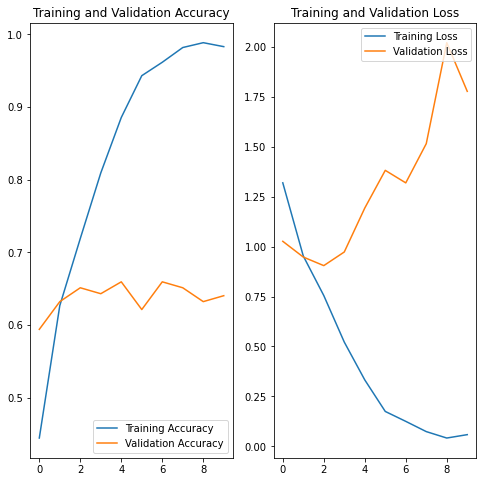

In [ ]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(image_height, 
                                                              image_height,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


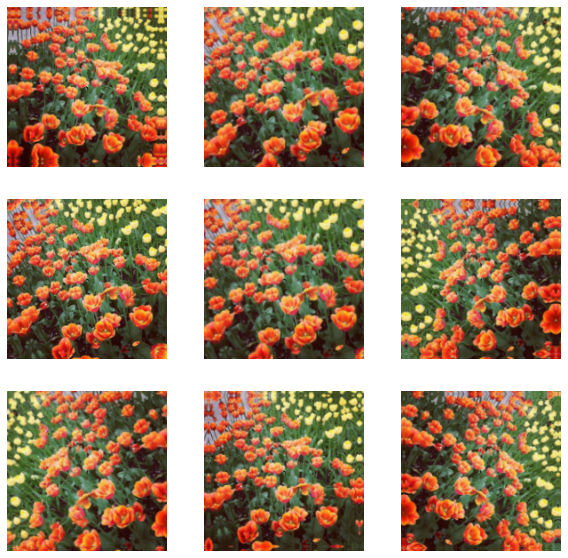

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
num_classes = 5
model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    #convo
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    #convo2
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    #convo3
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),

                    #dropout(optimaze)
                    layers.Dropout(0.2),
                    #fully connected layer
                    layers.Flatten(),
                    layers.Dense(128,activation='relu'),
                    layers.Dense(num_classes)
                    ])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = valid_ds,
    epochs = epochs
)

Epoch 1/10
104/104 [==============================] - 117s 1s/step - loss: 1.2894 - accuracy: 0.4541 - val_loss: 1.0686 - val_accuracy: 0.5368
Epoch 2/10
104/104 [==============================] - 116s 1s/step - loss: 1.0459 - accuracy: 0.5807 - val_loss: 0.9892 - val_accuracy: 0.6076
Epoch 3/10
104/104 [==============================] - 116s 1s/step - loss: 0.9521 - accuracy: 0.6322 - val_loss: 0.9625 - val_accuracy: 0.6240
Epoch 4/10
104/104 [==============================] - 115s 1s/step - loss: 0.8698 - accuracy: 0.6615 - val_loss: 0.8226 - val_accuracy: 0.6894
Epoch 5/10
104/104 [==============================] - 116s 1s/step - loss: 0.8230 - accuracy: 0.6863 - val_loss: 0.8218 - val_accuracy: 0.6866
Epoch 6/10
104/104 [==============================] - 115s 1s/step - loss: 0.7767 - accuracy: 0.7054 - val_loss: 0.7691 - val_accuracy: 0.7030
Epoch 7/10
104/104 [==============================] - 115s 1s/step - loss: 0.7307 - accuracy: 0.7206 - val_loss: 0.7724 - val_accuracy: 0.6839

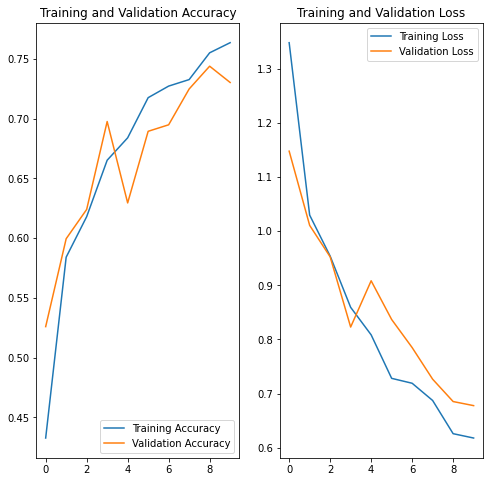

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict New Image

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
gambar = Image.open(BytesIO(uploaded['daisy2.jpg']))

Saving daisy2.jpg to daisy2 (1).jpg


<function matplotlib.pyplot.show>

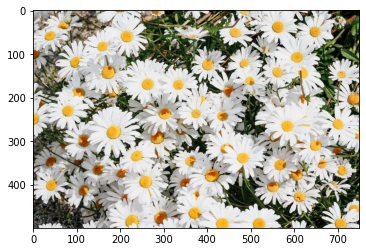

In [ ]:
plt.imshow(gambar)
plt.show


Gambar ini termasuk jenis bunga daisy dengan tingkat akurasi 85.77%.


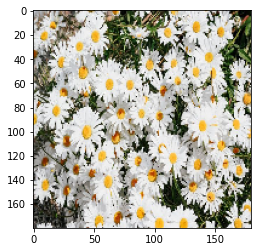

In [ ]:
#Resizing
input_size = (180,180)
img_new = gambar.convert('RGB').resize(input_size,resample=0)
plt.imshow(img_new)
plt.show

#Predict
img_array = keras.preprocessing.image.img_to_array(img_new)
img_array = tf.expand_dims(img_array,0) #create batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0]) 
#module nn untuk menghitung

print(
    "Gambar ini termasuk jenis bunga {} dengan tingkat akurasi {:.2f}%."
    .format(class_names[np.argmax(score)],100*np.max(score)) 
)